# Problem definition

In [1]:
using GeoStats
using DataFrames
using Plots; gr(size=(950,200))

df = DataFrame(x=100*rand(200), y=100*rand(200), porosity=randn(200))

geodata = GeoDataFrame(df, [:x,:y])

domain = RegularGrid{Float64}(100, 100)

problem = SimulationProblem(geodata, domain, :porosity, 100)

2D SimulationProblem (conditional)
  data:      200×3 GeoDataFrame (x and y)
  domain:    100×100 RegularGrid{Float64,2}
  variables: porosity (Float64)
  N° reals:  100

# Solver options

The user can specify any variogram model available in the [Variography.jl](https://github.com/juliohm/Variography.jl) package:

In [2]:
using DirectGaussianSimulation

solver₁ = DirectGaussSim(:porosity => @NT(variogram=SphericalVariogram(range=35.)))
solver₂ = DirectGaussSim(:porosity => @NT(variogram=ExponentialVariogram(range=35.)))

solutions = [solve(problem, solver) for solver in [solver₁, solver₂]]

2-element Array{GeoStatsBase.SimulationSolution{GeoStatsDevTools.RegularGrid{Float64,2}},1}:
 2D SimulationSolution
 2D SimulationSolution

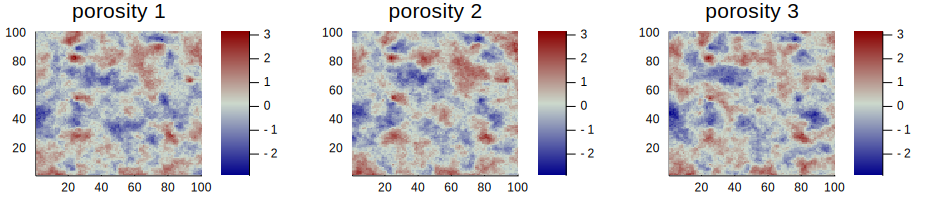

In [3]:
plot(solutions[1])

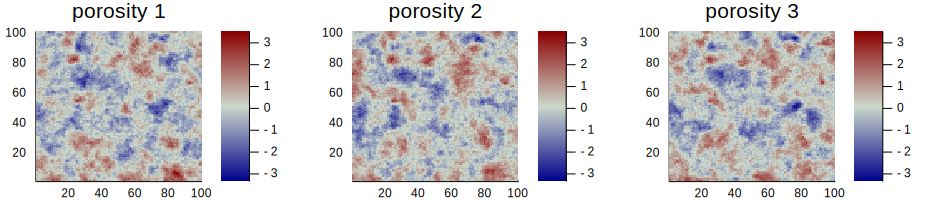

In [4]:
plot(solutions[2])